In [206]:
# color interpolation using OKLAB
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

import colour
from colour.plotting import (
    plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931,
    plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS,
    colour_style,
    override_style,
    artist
)
# https://colour.readthedocs.io/en/develop/generated/colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931.html


#from colour.plotting.common import KwargsArtist

# print to get list of properties
#print(colour_style())


#-------------------
#https://github.com/scikit-image/scikit-image/blob/main/skimage/color/colorconv.py
# conda install -c anaconda scikit-image 
# note https://poynton.ca/notes/colour_and_gamma/ColorFAQ.html#RTFToC36
from skimage import color


#------------------------ 
import importlib
import colorxform 
# to reload after changes

importlib.reload(colorxform);

{'figure.figsize': (12.8, 7.2), 'figure.dpi': 100, 'savefig.dpi': 100, 'savefig.bbox': 'standard', 'axes.titlesize': 'x-large', 'axes.labelsize': 'larger', 'legend.fontsize': 'small', 'xtick.labelsize': 'medium', 'ytick.labelsize': 'medium', 'text.color': '#111111', 'xtick.top': False, 'xtick.bottom': True, 'ytick.right': False, 'ytick.left': True, 'xtick.minor.visible': True, 'ytick.minor.visible': True, 'xtick.direction': 'out', 'ytick.direction': 'out', 'xtick.major.size': 6.25, 'xtick.minor.size': 3.75, 'ytick.major.size': 6.25, 'ytick.minor.size': 3.75, 'xtick.major.width': 1, 'xtick.minor.width': 1, 'ytick.major.width': 1, 'ytick.minor.width': 1, 'axes.linewidth': 1, 'axes.edgecolor': '#333333', 'axes.titlepad': 7.5, 'axes.facecolor': '#F5F5F5', 'axes.grid': True, 'axes.grid.which': 'major', 'axes.grid.axis': 'both', 'axes.axisbelow': True, 'grid.linewidth': 0.5, 'grid.linestyle': '--', 'grid.color': '#D5D5D5', 'legend.frameon': True, 'legend.framealpha': 0.75, 'legend.fancybox':

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [202]:
#test colorform RGBA->HSV

importlib.reload(colorxform);

cx = colorxform.ColorXform()

hue_gamut =  np.linspace(0., 1.0, num=11)

gamut_RGBY = []
        
for hue in hue_gamut:
    #print(hue)
    temp_RGBY = np.array(cx.hsv_to_rgba(hue, hue, hue))
    #print(temp_RGBY)
    gamut_RGBY.append(temp_RGBY)
    H, S, V = RGBA_to_HSV(temp_RGBY[0],temp_RGBY[1], temp_RGBY[2], temp_RGBY[3] )
    print(H,S,V)
    
gamut_RGBY = np.array(gamut_RGBY);

warning, XYZ out of range
283.524895027703 1.0 0.0
53.926993538792715 0.91 0.1
57.61906298183584 0.84 0.2
75.6942863764441 0.79 0.3
106.22255480019169 0.76 0.4
144.22301353086596 0.75 0.5
178.9282283142195 0.76 0.6
229.2870759603544 0.79 0.7
278.35647382197305 0.84 0.8
336.1622357856473 0.91 0.9
3.6888879530366694 1.0 1.0


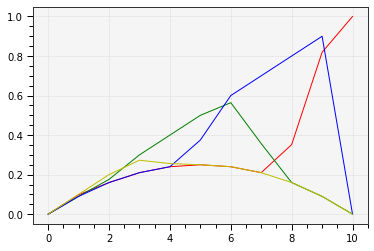

In [203]:
figure = plt.figure()


ax2 = figure.add_subplot()
ax2.plot(gamut_RGBY[:,0],'r')
ax2.plot(gamut_RGBY[:,1],'g')
ax2.plot(gamut_RGBY[:,2],'b')
ax2.plot(gamut_RGBY[:,3],'y')

#colour.plotting.plot_multi_colour_swatches(gamut_RGB)


In [204]:
def hue_angle(xy_vec):
        ''' calculate hue angle in degrees from CIE space vector'''
        angle = (360/(2*np.pi))*np.arctan2(xy_vec[0], xy_vec[1])
        #sat = np.linalg.norm(xy_vec)
        return( ((angle + 360.)%360.) )

#calculate color angles in Best RGB colorspace
colourspace = colour.RGB_COLOURSPACES['Best RGB']    
print(f"using {colourspace.name}")

red_pri = colourspace.primaries[0]
red_XYZ = colour.xy_to_XYZ(red_pri)
grn_pri = colourspace.primaries[1]
grn_XYZ = colour.xy_to_XYZ(grn_pri)
blu_pri = colourspace.primaries[2]
blu_XYZ = colour.xy_to_XYZ(blu_pri)
org590_xy = np.array([0.575151311, 0.424232235])

white_xy  = colourspace.whitepoint
print(f"white_xy = {white_xy}")

red_vec = white_xy - red_pri
red_angle = hue_angle(red_vec)

org_vec = white_xy - org590_xy
org_angle = hue_angle(org_vec)

grn_vec = white_xy - grn_pri
grn_angle = hue_angle(grn_vec)

blu_vec = white_xy - blu_pri
blu_angle = hue_angle(blu_vec)

print(f"red_angle = {red_angle}")
print(f"org_angle = {org_angle}")
print(f"grn_angle = {grn_angle}")
print(f"blu_angle = {blu_angle}")



using Best RGB
white_xy = [ 0.3457  0.3585]
red_angle = 283.52544589586876
org_angle = 254.01427658356664
grn_angle = 162.5869443783647
blu_angle = 33.665683750661515


In [205]:
importlib.reload(colorxform);
cx = colorxform.ColorXform()

def hue_angle(xy_vec):
        import math
        ''' calculate hue angle in degrees from CIE space vector'''
        # numpy version
        #angle = (360/(2*math.pi))*math.arctan2(xy_vec[0], xy_vec[1])
        angle = (360/(2*math.pi))*math.atan2(xy_vec[0], xy_vec[1])
        #sat = np.linalg.norm(xy_vec)
        return((angle + 360.)%360.)



def XYZ_to_RGBA(X, Y, Z):
    import math
    ''' convert color/luminance specification in CIE XYZ coordinates to hsv
       This version uses the colour_science library https://colour.readthedocs.io/'''
    red_angle = 283.53
    org_angle = 254.01
    grn_angle = 162.59
    blu_angle = 33.67
    
    #D50 colorpoint from Best RGB colorspace
    white_xy = [ 0.3457,  0.3585]

    #red< 283.52 org< 254.014 grn< 162.59 blu< 33.67
    #print(f"red< {red_angle} org< {org_angle} grn< {grn_angle} blu< {blu_angle}")

    x, y, Y = cx.XYZ_to_xyY(X, Y, Z)
    tmp_vec = [white_xy[0] - x, white_xy[1] - y]
    inp_angle = hue_angle(tmp_vec)

    # fractions of the primaries we need to mix to get this hue
    red_frac = 0.
    org_frac = 0.
    grn_frac = 0.
    blu_frac = 0.
    
    # figure out what quadrant of the RGBA gamut we are in
    # angle increases counterclockwise so work backwards from red to blue
    if inp_angle >= red_angle or inp_angle < blu_angle:
        quad = "red-blu"
        # figure out fraction of angle between red and blue vector
        if inp_angle < blu_angle:
            # add 360 to avoid zero wraparound
            inp_angle = inp_angle + 360
        blu_frac = (inp_angle - red_angle)/(blu_angle + 360 - red_angle) 
        red_frac = 1.0 - blu_frac
        assert(blu_frac >= 0)
        
#                                     grn_pri
#                                         \            
#                                          \ (org_frac)           
#                                           \            
#                                            \            
#         white ------- temp_xy-----------gamut_intercept
#                                              \            
#                                               \            
#                                                \ (grn_frac)           
#                                                 \            
#                                               org_pri
        
        # find intercept point at gamut which is maximum saturation
        #x_gam = blu_frac*(blu_pri) + red_frac*(red_pri)
        x_gam = blu_frac*(blu_vec) + red_frac*(red_vec)

        # saturation is fraction of distance from white to fully saturated (gamut intercept)
        # so 1 - ratio of lenghs of vector from white to fully saturated
        
        
    elif inp_angle >= org_angle:
        quad ="org-red"

        red_frac = (inp_angle - org_angle)/(red_angle - org_angle)
        org_frac = 1. - red_frac
        assert(red_frac >= 0)
#        x_gam = org_frac*(org590_xy) + red_frac*(red_pri)
        x_gam = org_frac*(org_vec) + red_frac*(red_vec)


        
    elif inp_angle >= grn_angle:
        quad = "grn-org"
        org_frac = (inp_angle - grn_angle)/(org_angle - grn_angle)
        grn_frac = 1. - org_frac
        assert(grn_frac >= 0)
#        x_gam = org_frac*(org590_xy) + grn_frac*(grn_pri)
        x_gam = org_frac*(org_vec) + grn_frac*(grn_vec)
        
    elif inp_angle >= blu_angle:
        quad = "blu-grn"
        grn_frac = (inp_angle - blu_angle)/(grn_angle - blu_angle)
        blu_frac = 1. - grn_frac
        assert(blu_frac >= 0)
#        x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
        x_gam = blu_frac*(blu_vec) + grn_frac*(grn_vec)

    else: # wrap around or negative
        print(" oops impossible color")
        assert(False)


    sat_x = x_gam[0]
    sat_y = x_gam[1]
    #x_sat = x_gam
    sat = math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(sat_x**2 + sat_y**2)
        
    #print(quad)
    #print(f"red frac {red_frac} org_frac {org_frac} grn_frac {grn_frac} blu< {blu_frac}")

    return(red_frac, grn_frac, blu_frac, org_frac, sat)

def XYZ_to_hue(X, Y, Z):
    import math
    ''' convert color/luminance specification in CIE XYZ coordinates to hue angle
       This version uses the colour_science library https://colour.readthedocs.io/'''
    # these angles are in xy space

    
    #D50 colorpoint from Best RGB colorspace
    white_xy = [ 0.3457,  0.3585]

    #red< 283.52 org< 254.014 grn< 162.59 blu< 33.67
    #print(f"red< {red_angle} org< {org_angle} grn< {grn_angle} blu< {blu_angle}")

    x, y, Y = cx.XYZ_to_xyY(X, Y, Z)
    tmp_vec = [white_xy[0] - x, white_xy[1] - y]
    # calculate angle and offset so red is = zero = 360
    red_zero_angle = 50.
    return((720 - red_zero_angle - hue_angle(tmp_vec))%360.)

def RGBA_to_HSV(R, G, B, A):
    maxc = max((R, G, B, A))
    minc = min((R, G, B, A))

    X, Y, Z = cx.RGBA_to_XYZ(R,G,B,A)
    hue = XYZ_to_hue(X, Y, Z)

#     # calculate saturation
#     if val > 0.5:
#         sat = ( maxc-minc)/(2.0-maxc-minc)
#     else:
#         if (maxc + minc) > 0:
#             sat = (maxc-minc)/(maxc+minc)
#         else:
#             sat = 0

    # saturation of RGBA val
    val = maxc
    sat = 1. - minc
    return(hue, sat, val)



def hue_to_RGBA(inp_angle):
    # fractions of the primaries we need to mix to get this hue

    red_angle = 283.53
    org_angle = 254.01
    grn_angle = 162.59
    blu_angle = 33.67
    
    red_frac = 0.
    org_frac = 0.
    grn_frac = 0.
    blu_frac = 0.


    # figure out what quadrant of the RGBA gamut we are in
    # angle increases counterclockwise so work backwards from red to blue
    if inp_angle >= red_angle or hue_angle < blu_angle:
        quad = "red-blu"
        # figure out fraction of angle between red and blue vector
        if inp_angle < blu_angle:
            # add 360 to avoid zero wraparound
            inp_angle = inp_angle + 360
        blu_frac = (inp_angle - red_angle)/(blu_angle + 360 - red_angle) 
        red_frac = 1.0 - blu_frac
        assert(blu_frac >= 0)
        
#                                     grn_pri
#                                         \            
#                                          \ (org_frac)           
#                                           \            
#                                            \            
#         white ------- temp_xy-----------gamut_intercept
#                                              \            
#                                               \            
#                                                \ (grn_frac)           
#                                                 \            
#                                               org_pri
        
        # find intercept point at gamut which is maximum saturation
        #x_gam = blu_frac*(blu_pri) + red_frac*(red_pri)
        x_gam = blu_frac*(blu_vec) + red_frac*(red_vec)

        # saturation is fraction of distance from white to fully saturated (gamut intercept)
        # so 1 - ratio of lenghs of vector from white to fully saturated
        
        
    elif inp_angle >= org_angle:
        quad ="org-red"

        red_frac = (inp_angle - org_angle)/(red_angle - org_angle)
        org_frac = 1. - red_frac
        assert(red_frac >= 0)
#        x_gam = org_frac*(org590_xy) + red_frac*(red_pri)
        x_gam = org_frac*(org_vec) + red_frac*(red_vec)


        
    elif inp_angle >= grn_angle:
        quad = "grn-org"
        org_frac = (inp_angle - grn_angle)/(org_angle - grn_angle)
        grn_frac = 1. - org_frac
        assert(grn_frac >= 0)
#        x_gam = org_frac*(org590_xy) + grn_frac*(grn_pri)
        x_gam = org_frac*(org_vec) + grn_frac*(grn_vec)
        
    elif inp_angle >= blu_angle:
        quad = "blu-grn"
        grn_frac = (inp_angle - blu_angle)/(grn_angle - blu_angle)
        blu_frac = 1. - grn_frac
        assert(blu_frac >= 0)
#        x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
        x_gam = blu_frac*(blu_vec) + grn_frac*(grn_vec)

    else: # wrap around or negative
        print(" oops impossible color")
        assert(False)


    sat_x = x_gam[0]
    sat_y = x_gam[1]
    #x_sat = x_gam
    sat = math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(sat_x**2 + sat_y**2)
        
    #print(quad)
    #print(f"red frac {red_frac} org_frac {org_frac} grn_frac {grn_frac} blu< {blu_frac}")

    return(red_frac, grn_frac, blu_frac, org_frac, sat)


In [174]:
importlib.reload(colorxform);
cx = colorxform.ColorXform()

gamut_XYZ = []
# round trip RGBA --- check conversion
RT_RGBY = []
RT_HSV = []
importlib.reload(colorxform);
for rgby in gamut_RGBY:
    X, Y, Z = cx.RGBA_to_XYZ(rgby[0], rgby[1], rgby[2], rgby[3])
    gamut_XYZ.append(np.array([X, Y, Z]))  
    R, G, B, A, sat = XYZ_to_RGBA(X, Y, Z)
    RT_RGBY.append(np.array([R, G, B, A, sat]))
    H, S, V = RGBA_to_HSV(rgby[0], rgby[1], rgby[2], rgby[3])
    RT_HSV.append(np.array([H,S,V]))
    
RT_RGBY = np.array(RT_RGBY)
RT_HSV = np.array(RT_HSV)
with np.printoptions(suppress=True):
    print(RT_HSV)

[[  14.53208018    0.36842105    0.7       ]
 [  17.73645846    0.36842105    0.7       ]
 [  20.54298317    0.36842105    0.7       ]
 [  23.01017623    0.36842105    0.7       ]
 [  30.26746009    0.36842105    0.7       ]
 [  40.66917625    0.36842105    0.7       ]
 [  53.94000166    0.36842105    0.7       ]
 [  72.9593637     0.36842105    0.7       ]
 [  98.90148976    0.36842105    0.7       ]
 [ 121.75802927    0.36842105    0.7       ]
 [ 125.23460523    0.36842105    0.7       ]
 [ 128.87851322    0.36842105    0.7       ]
 [ 132.67066926    0.36842105    0.7       ]
 [ 136.58527723    0.36842105    0.7       ]
 [ 140.59034622    0.36842105    0.7       ]
 [ 144.64891585    0.36842105    0.7       ]
 [ 147.98927114    0.36842105    0.7       ]
 [ 152.05690657    0.36842105    0.7       ]
 [ 156.87452077    0.36842105    0.7       ]
 [ 162.4181005     0.36842105    0.7       ]
 [ 168.59480031    0.36842105    0.7       ]
 [ 175.23112973    0.36842105    0.7       ]
 [ 178.172

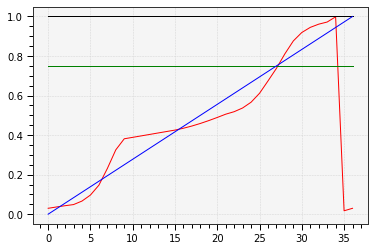

In [153]:
figure = plt.figure()

ax2 = figure.add_subplot()
ax2.plot(RT_HSV[:,0]/360,'r')
ax2.plot(RT_HSV[:,1],'k')
ax2.plot(RT_HSV[:,2],'g')
ax2.plot(hue_gamut,'b')

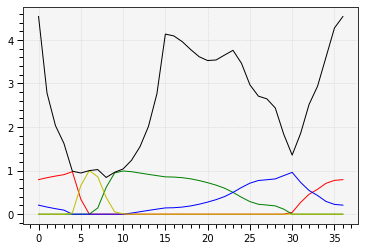

In [59]:
figure = plt.figure()


ax2 = figure.add_subplot()
ax2.plot(RT_RGBY[:,0],'r')
ax2.plot(RT_RGBY[:,1],'g')
ax2.plot(RT_RGBY[:,2],'b')
ax2.plot(RT_RGBY[:,3],'y')
ax2.plot(RT_RGBY[:,4],'k')

#colour.plotting.plot_multi_colour_swatches(gamut_RGB)
